In [27]:
# Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in datasets and merge them into a single df
# Create empty df to store data
df = pd.DataFrame()
# Loop through years
for year in ['2018', '2020', '2022']:
    # Read in year data
    year_data = pd.read_csv(Path('resources', ('mci_' + year + '.csv')))
    # concatenate with general df
    df = pd.concat([df, year_data])
    # Log number of rows for this year and total in general df
    print(f"After reading in {len(year_data)} rows of data from year {year}, the total number of rows is: {len(df)}")


After reading in 37490 rows of data from year 2018, the total number of rows is: 37490
After reading in 35065 rows of data from year 2020, the total number of rows is: 72555
After reading in 40226 rows of data from year 2022, the total number of rows is: 112781


In [5]:
# Show how raw dataframe looks like
df.head()

,_id,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,LOCATION_TYPE,PREMISES_TYPE,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140
0,134022,GO-20181532,2018-01-01,2018-01-01,2018,January,1,1,Monday,4.0,...,Other Commercial / Corporate Places (For Profi...,Commercial,1430,100,Assault,Assault,168,Downtown Yonge East,75,Church-Yonge Corridor (75)
1,134023,GO-20184352,2018-01-01,2018-01-01,2018,January,1,1,Monday,18.0,...,"Apartment (Rooming House, Condo)",Apartment,1430,100,Assault,Assault,150,Fenside-Parkwoods,45,Parkwoods-Donalda (45)
2,134024,GO-20184878,2018-01-01,2018-01-01,2018,January,1,1,Monday,21.0,...,"Apartment (Rooming House, Condo)",Apartment,1420,100,Assault With Weapon,Assault,106,Humewood-Cedarvale,106,Humewood-Cedarvale (106)
3,134025,GO-20183609,2018-01-01,2018-01-01,2018,January,1,1,Monday,15.0,...,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,2130,210,Theft Over,Theft Over,95,Annex,95,Annex (95)
4,134026,GO-20184674,2018-01-01,2018-01-01,2018,January,1,1,Monday,20.0,...,Convenience Stores,Commercial,1610,210,Robbery - Business,Robbery,123,Cliffcrest,123,Cliffcrest (123)


In [25]:
# Some offences were reported within the same day, some were reported in another day
different_dates = df[df['REPORT_DATE'] != df['OCC_DATE']]
print(different_dates)

          _id EVENT_UNIQUE_ID REPORT_DATE   OCC_DATE  REPORT_YEAR  \
97     134137     GO-20189063  2018-01-02 2018-01-01         2018   
98     134139     GO-20185439  2018-01-02 2018-01-01         2018   
104    134149     GO-20186854  2018-01-02 2018-01-01         2018   
112    134159     GO-20187788  2018-01-02 2018-01-01         2018   
114    134165     GO-20188891  2018-01-02 2018-01-01         2018   
...       ...             ...         ...        ...          ...   
40215  323286  GO-20222558042  2022-12-31 2022-12-29         2022   
40217  323288  GO-20222563482  2022-12-31 2022-12-29         2022   
40218  323289  GO-20222563482  2022-12-31 2022-12-29         2022   
40221  323292  GO-20222554300  2022-12-31 2022-12-22         2022   
40223  323294  GO-20222559486  2022-12-31 2022-12-22         2022   

      REPORT_MONTH  REPORT_DAY  REPORT_DOY  REPORT_DOW  REPORT_HOUR  ...  \
97         January           2           2  Tuesday            15.0  ...   
98         January 

In [11]:
# Create a new data frame showing just relevant columns
df_simplified = df.loc[:, ['OCC_DATE', 'OCC_HOUR', 'REPORT_DATE', 'REPORT_HOUR']]
df_simplified.head()

,OCC_DATE,OCC_HOUR,REPORT_DATE,REPORT_HOUR
0,2018-01-01,4.0,2018-01-01,4.0
1,2018-01-01,18.0,2018-01-01,18.0
2,2018-01-01,2.0,2018-01-01,21.0
3,2018-01-01,NaN,2018-01-01,15.0
4,2018-01-01,20.0,2018-01-01,20.0


In [13]:
# Check if all values are in correct format
nan_counts = df_simplified.isna().sum()
print(nan_counts)

OCC_DATE          0
OCC_HOUR       7528
REPORT_DATE       0
REPORT_HOUR    3566
dtype: int64


In [15]:
# Clear NaN values, create new data frame
df_cleaned = df_simplified.dropna()
df_cleaned.head()

,OCC_DATE,OCC_HOUR,REPORT_DATE,REPORT_HOUR
0,2018-01-01,4.0,2018-01-01,4.0
1,2018-01-01,18.0,2018-01-01,18.0
2,2018-01-01,2.0,2018-01-01,21.0
4,2018-01-01,20.0,2018-01-01,20.0
5,2018-01-01,20.0,2018-01-01,20.0


In [36]:
# Create a copy of the main data frame
df_cleaned = df_cleaned.copy()

# Create 2 new columns for occurence and report date showing date + time of offence
df_cleaned['OCC_DATETIME'] = pd.to_datetime(df_cleaned['OCC_DATE'].dt.strftime('%Y-%m-%d') + ' ' + df_cleaned['OCC_HOUR'].astype(str).str.zfill(2) + ':00:00')
df_cleaned['REPORT_DATETIME'] = pd.to_datetime(df_cleaned['REPORT_DATE'].dt.strftime('%Y-%m-%d') + ' ' + df_cleaned['REPORT_HOUR'].astype(str).str.zfill(2) + ':00:00')

# Calculate difference as hour
df_cleaned['HOUR_DIFFERENCE'] = (df_cleaned['REPORT_DATETIME'] - df_cleaned['OCC_DATETIME']).dt.total_seconds() / 3600
df_cleaned.head(10)

,OCC_DATE,OCC_HOUR,REPORT_DATE,REPORT_HOUR,OCC_DATETIME,REPORT_DATETIME,HOUR_DIFFERENCE
0,2018-01-01,4.0,2018-01-01,4.0,2018-01-01 04:00:00,2018-01-01 04:00:00,0.0
1,2018-01-01,18.0,2018-01-01,18.0,2018-01-01 18:00:00,2018-01-01 18:00:00,0.0
2,2018-01-01,2.0,2018-01-01,21.0,2018-01-01 02:00:00,2018-01-01 21:00:00,19.0
4,2018-01-01,20.0,2018-01-01,20.0,2018-01-01 20:00:00,2018-01-01 20:00:00,0.0
5,2018-01-01,20.0,2018-01-01,20.0,2018-01-01 20:00:00,2018-01-01 20:00:00,0.0
7,2018-01-01,2.0,2018-01-01,2.0,2018-01-01 02:00:00,2018-01-01 02:00:00,0.0
8,2018-01-01,2.0,2018-01-01,2.0,2018-01-01 02:00:00,2018-01-01 02:00:00,0.0
9,2018-01-01,1.0,2018-01-01,1.0,2018-01-01 01:00:00,2018-01-01 01:00:00,0.0
10,2018-01-01,3.0,2018-01-01,4.0,2018-01-01 03:00:00,2018-01-01 04:00:00,1.0
11,2018-01-01,3.0,2018-01-01,4.0,2018-01-01 03:00:00,2018-01-01 04:00:00,1.0


In [35]:
# Calculate average difference between when it was occurred and reported
average_hour_difference = df_cleaned['HOUR_DIFFERENCE'].mean()
average_day_difference = average_hour_difference / 24

print(f'Average Difference: {average_hour_difference:.2f} hours or {average_day_difference:.2f} days')
maxhour = df_cleaned['HOUR_DIFFERENCE'].max()
print(f'Maximum value: {maxhour} hours')

Average Difference: 180.22 hours or 7.51 days
Maximum value: 43584.0 hours


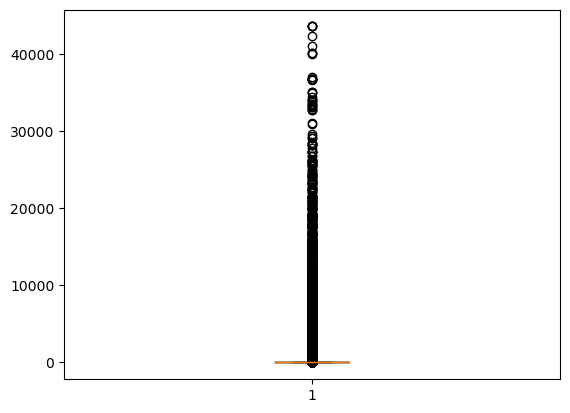

In [29]:
# Show in statistical visualization

fig1, ax1 = plt.subplots()
ax1.boxplot(df_cleaned['HOUR_DIFFERENCE'])
plt.show()